# Engenius '20 - Sales Prediction

## Overview

The Main goal is to predict the quantities sold of a set of products within a 4 months time frame.

# Table Of Contents

- Exploratory Data Analysis
    -  Missing & Erroneous Value Treatment
    -  Distribution of Products Sold
   
- Missing & Erroneous Value Treatment
- Acquisition of Socio-Economical And Demographical Data
- Resources

# Exploratory Data Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
product_sheets = ['PRODUCT_A', 'PRODUCT_B', 'PRODUCT_C', 'PRODUCT_V', 'PRODUCT_X']
data = {}

for s in product_sheets:
    data[s] = pd.read_excel('datasets/Data2017-2019.xls', s)
    

In [3]:
# merge data frames for all 5 products vertically
df_all5 = data[product_sheets[0]]
for i,s in enumerate(product_sheets):
    if i != 0:
        df_all5 = df_all5.append(data[s], ignore_index=True)


In [4]:
df_all5.shape

(58032, 5)

In [5]:
df_all5.Product.value_counts()

PRODUCT_C    17980
PRODUCT_B    17962
PRODUCT_A    17371
PRODUCT_X     2920
PRODUCT_V     1799
Name: Product, dtype: int64

### Missing & Erroneous Value Treatment
- ratio of null values
  No null values as seen below

In [6]:
(df_all5.isnull().sum() / df_all5.shape[0])

Year        0.0
Period      0.0
Product     0.0
Province    0.0
Quantity    0.0
dtype: float64

* ratio of transactions (sales) with negative quantities
  probably product return

In [7]:
(df_all5[df_all5.Quantity < 0].shape[0] / df_all5.shape[0])

0.0016197959746346844

In [8]:
data_sorted = df_all5.sort_values(by=['Period', 'Province', 'Product']).reset_index(drop=True)
data_sorted.head(5)

,Year,Period,Product,Province,Quantity
0,2017,201701,PRODUCT_A,ADANA,11
1,2017,201701,PRODUCT_A,ADANA,25
2,2017,201701,PRODUCT_A,ADANA,54
3,2017,201701,PRODUCT_A,ADANA,17
4,2017,201701,PRODUCT_A,ADANA,30


In [9]:
data_sorted = df_all5.sort_values(by=['Period', 'Province', 'Product']).reset_index(drop=True)
data_sorted.head(5)

,Year,Period,Product,Province,Quantity
0,2017,201701,PRODUCT_A,ADANA,11
1,2017,201701,PRODUCT_A,ADANA,25
2,2017,201701,PRODUCT_A,ADANA,54
3,2017,201701,PRODUCT_A,ADANA,17
4,2017,201701,PRODUCT_A,ADANA,30


In [10]:
# fixes ıstanbul typo
data_sorted['Province'] = data_sorted.Province.apply(lambda x: 'İSTANBUL' if x == 'ISTANBUL' else x)

In [11]:
#aggragate products sold
data_aggregated = data_sorted.groupby(['Period', 'Province', 'Product'])['Quantity'].sum().reset_index()
data_aggregated.head(8)

,Period,Province,Product,Quantity
0,201701,ADANA,PRODUCT_A,346
1,201701,ADANA,PRODUCT_B,4838
2,201701,ADANA,PRODUCT_C,1004
3,201701,ADANA,PRODUCT_V,20
4,201701,ADANA,PRODUCT_X,910
5,201701,ADIYAMAN,PRODUCT_A,36
6,201701,ADIYAMAN,PRODUCT_B,45
7,201701,ADIYAMAN,PRODUCT_C,206
8,201701,ADIYAMAN,PRODUCT_X,44
9,201701,AFYON,PRODUCT_A,66


In [12]:
data_aggregated.shape

(13343, 4)

In [13]:
data_aggregated.to_csv('datasets/data_aggregated.csv')

#### Checkpoint-1

In [69]:
data_aggregated = pd.read_csv('datasets/data_aggregated.csv')

### Distribution of Products Sold

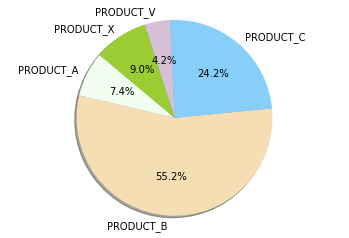

Product
PRODUCT_A     576747
PRODUCT_B    4291439
PRODUCT_C    1879572
PRODUCT_V     324499
PRODUCT_X     696845
Name: Quantity, dtype: int64

In [82]:
labels = product_sheets
sizes = data_aggregated.groupby(['Product'])['Quantity'].sum().sort_index().tolist()
colors = ['honeydew', 'wheat', 'lightskyblue', 'thistle', 'yellowgreen']
#explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

data_aggregated.groupby(['Product'])['Quantity'].sum().sort_index()

### Geographical Distribution of Sales By City

In [15]:
#cities world-countries.json > the coordinates file is cited (please look at Resources #1)
turkey_cities_json_source = 'geo_json/tr-cities-utf8.json'

In [72]:
data_heat_general = data_aggregated[['Province', 'Quantity']]
data_heat_general = data_heat_general.groupby(['Province'])['Quantity'].sum().reset_index()
data_heat_general['Province'] = data_heat_general['Province'].apply(lambda x: x.capitalize().replace('i̇', 'i')) 
data_heat_general.head()

data_heat_general.sort_values(by=['Province'], ascending=True).reset_index(drop=True)[20:]

,Province,Quantity
20,Bursa,292112
21,Denizli,120563
22,Diyarbakir,60115
23,Düzce,30130
24,Edirne,45970
...,...,...
76,İstanbul,1697599
77,İzmir,522250
78,İçel,146782
79,Şanliurfa,67677


In [17]:
# matching and correcting city names
city_correction_dict = {}
city_correction_dict['Adiyaman'] = 'Adıyaman'
city_correction_dict['Ağri'] = 'Ağrı'
city_correction_dict['Aydin'] = 'Aydın'
city_correction_dict['Balikesir'] = 'Balıkesir'
city_correction_dict['Bartin'] = 'Bartın'
city_correction_dict['Bingol'] = 'Bingöl'
city_correction_dict['Çanakkkale'] = 'Çanakkale'
city_correction_dict['Çankiri'] = 'Çankırı'
city_correction_dict['Diyarbakir'] = 'Diyarbakır'
city_correction_dict['Elaziğ'] = 'Elazığ'
city_correction_dict['Iğdir'] = 'Iğdır'
city_correction_dict['Kirikkale'] = 'Kırıkkale'
city_correction_dict['Kirklareli'] = 'Kırklareli'
city_correction_dict['Kirşehir'] = 'Kırşehir'
city_correction_dict['İçel'] = 'Mersin'
city_correction_dict['Şanliurfa'] = 'Şanlıurfa'
city_correction_dict['Şirnak'] = 'Şırnak'


data_heat_general['Province'] = data_heat_general['Province'].apply(lambda x: city_correction_dict[x] if x in city_correction_dict.keys() else x) 

In [18]:
import math
data_heat_general['Quantity'] = data_heat_general['Quantity'].apply(lambda x: math.log(x+0.001))
data_heat_general.head(10)

,Province,Quantity
0,Adana,12.218811
1,Adıyaman,9.985574
2,Afyon,11.004281
3,Aksaray,10.743221
4,Amasya,10.457574
5,Ankara,13.036670
6,Antalya,12.732808
7,Ardahan,7.971431
8,Artvin,9.007367
9,Aydın,11.939389


In [19]:
# An open source geographical heat map library used for data visualization (please look at Resources #2)
import folium

turkey_heat_map_general_products_sold_by_city = folium.Map(
    location=[39.855555, 34.665873],
    #tiles='Stamen Terrain',
    zoom_start=5
)

turkey_heat_map_general_products_sold_by_city.choropleth(geo_data=turkey_cities_json_source, data=data_heat_general, columns=['Province', 'Quantity'], key_on='feature.properties.name',
                         fill_color='OrRd', fill_opacity=0.7,  line_opacity=0.2, nan_fill_color='black', nan_fill_opacity=0.2)

turkey_heat_map_general_products_sold_by_city

/home/a/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# Acquisition of Socio-Economical And Demographical Data

### Gross Domestic Product By City
This demonstrates the accumulated wealth and flourishing of the city

In [28]:
# ((please look at Resources #7)
data_gpd_by_city = pd.read_csv('datasets/tuik/gpd_by_city_2018.csv', delimiter='|')

In [29]:
data_gpd_by_city = data_gpd_by_city.transpose().reset_index().rename(columns={0: 'GDP by City', 'index': 'Province'})
data_gpd_by_city['city_id'] = pd.to_numeric(data_gpd_by_city['Province'].apply(lambda x: x.split('-')[1]))
data_gpd_by_city['city_id'] = data_gpd_by_city['city_id'].apply(lambda x: x-1)
data_gpd_by_city['Province'] = data_gpd_by_city['Province'].apply(lambda x: x.split('-')[0])
data_gpd_by_city = data_gpd_by_city.set_index('city_id').sort_index()

In [30]:
data_gpd_by_city.head(3)

,Province,GDP by City
city_id,,
0,Adana,72187342.0
1,Adıyaman,13958454.0
2,Afyonkarahisar,22804455.0


### Life Expectancy By City
This may indicate how much does an ordinary citizen cares of his/her health in that particular city

In [32]:
# ((please look at Resources #8)
data_life_expectancy_by_city = pd.read_csv('datasets/tuik/life_expectancy_by_city.csv')
data_life_expectancy_by_city.tail(3)

,Province,life_expectancy
78,Kilis,76.1
79,Osmaniye,78.0
80,Düzce,77.5


### Population By City
This feature undisputedly should have a positive correlation with the number of products sold in that city.

In [37]:
# ((please look at Resources #9)
data_population_by_city = pd.read_csv('datasets/tuik/population_by_city_2018.csv')
data_population_by_city['population'] = pd.to_numeric(data_population_by_city['population'].apply(lambda x: x.replace(" ", "")))
data_population_by_city.head(3)

,Province,population
0,Adana,2220125
1,Adıyaman,624513
2,Afyonkarahisar,725568


### Population Growth Rate And Population Density By City
Since it reveals the number of newborns and toddlers, Population Growth Rate most probably contributes to the performance of our models especially for PRODUCT_C to a certain extend.

In [42]:
# ((please look at Resources #10)
data_population_growth_rate_density_by_city = pd.read_csv('datasets/tuik/pop_density_and_growth_rate.csv')
#data_population_by_city['population'] = pd.to_numeric(data_population_by_city['population'].apply(lambda x: x.replace(" ", "")))
data_population_growth_rate_density_by_city.head(3)

,Province,pop_growth_rate_2016_2017,pop_growth_rate_2017_2018,pop_growth_rate_2018_2019,pop_density_2017,pop_density_2018,pop_density_2019
0,Adana,6.7,1.6,8.0,159,160,161
1,Adıyaman,7.5,15.2,3.1,87,89,89
2,Afyonkarahisar,1.6,13.7,5.4,50,51,51


# Feature Creation

## Acquiring Infant and Toddlers Distrubution By City (0-4) by processing children count by age and city

- This age bracket strongly correlates peculiarly with Product C as stressed in EnGenius '20 presentation document.

In [4]:
data_children_count_by_age_and_city = pd.read_csv('datasets/tuik/children_number_by_age_and_city.csv', delimiter='|')
data_children_count_by_age_and_city = data_children_count_by_age_and_city.drop(columns=['Satırlar', 'Unnamed: 84'])
data_children_count_by_age_and_city = data_children_count_by_age_and_city.rename(columns={"Unnamed: 1": "category", "Unnamed: 2": "year"})
data_children_count_by_age_and_city['category'] = data_children_count_by_age_and_city['category'].fillna(method='ffill')
data_children_count_by_age_and_city['age'] = pd.to_numeric(data_children_count_by_age_and_city['category'].apply(lambda x: x.split(':')[2]))
data_children_count_by_age_and_city['gender'] = data_children_count_by_age_and_city['category'].apply(lambda x: (x.split(' ')[0]).split(':')[1])

data_infants_and_toddlers = data_children_count_by_age_and_city[data_children_count_by_age_and_city.age < 5].drop(columns=['category', 'gender', 'age']).groupby(['year']).sum().reset_index()
data_infants_and_toddlers = data_infants_and_toddlers.rename(columns={'year': 'Province'}).set_index(['Province']).transpose()
data_infants_and_toddlers = data_infants_and_toddlers.reset_index()
data_infants_and_toddlers['Province'] = data_infants_and_toddlers['index'].apply(lambda x: x.split('-')[0])
data_infants_and_toddlers['index'] = pd.to_numeric(data_infants_and_toddlers['index'].apply(lambda x: x.split('-')[1]))
data_infants_and_toddlers = data_infants_and_toddlers.set_index('Province').sort_values(by=['index'], ascending=True)
data_infants_and_toddlers.head(3)

Province,index,2017,2018,2019
Province,,,,
Adana,1,190594.0,187842.0,181508.0
Adıyaman,2,62631.0,62989.0,61142.0
Afyonkarahisar,3,52997.0,52944.0,51359.0


## Resources

1. Coordinates json file for the cities of Turkey:
   - https://github.com/cihadturhan/tr-geojson/tree/master/geo
2. An open source geographical heat map library used for data visualization
   - https://github.com/python-visualization/folium
3. ECILC / eczacibasi ilac monthly historical data
   - https://www.investing.com/equities/eczacibasi-ilac-historical-data
4. Borsa Istanbul monthly historical data
   - https://www.investing.com/indices/ise-100
5. DEVA Holding monthly historical data
   - https://www.investing.com/equities/deva-holding
6. Selçuk Ecza Deposu monthly historical data
   - https://www.investing.com/equities/selcuk-ecza-deposu
7. TUIK Gross Domestic Product By City (2018)
   - https://biruni.tuik.gov.tr/medas/?kn=116&locale=tr
8. TUIK Average Life Expectancy By City
   - http://www.tuik.gov.tr/PreIstatistikTablo.do?istab_id=2294
9. TUIK Population By City (2018)
   - http://www.tuik.gov.tr/PreIstatistikTablo.do?istab_id=1590
10. TUIK Population Growth Rate And Population Density By City (2017-2019)
   - http://www.tuik.gov.tr/PreIstatistikTablo.do?istab_id=1591